In [1]:
!pip install quantecon_book_networks
!pip install quantecon
!pip install pandas-datareader

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [3]:
import quantecon_book_networks
import quantecon_book_networks.input_output as qbn_io
import quantecon_book_networks.plotting as qbn_plt
import quantecon_book_networks.data as qbn_data

ch2_data = qbn_data.production()

quantecon_book_networks.config("matplotlib")
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
from matplotlib.patches import Polygon

In [4]:
def build_coefficient_matrices(Z, X):
    """
    Build coefficient matrices A and F from Z and X via

        A[i, j] = Z[i, j] / X[j]
        F[i, j] = Z[i, j] / X[i]

    """
    A, F = np.empty_like(Z), np.empty_like(Z)
    n = A.shape[0]
    for i in range(n):
        for j in range(n):
            A[i, j] = Z[i, j] / X[j]
            F[i, j] = Z[i, j] / X[i]

    return A, F

codes = ch2_data["us_sectors_15"]["codes"]
Z = ch2_data["us_sectors_15"]["adjacency_matrix"]
X = ch2_data["us_sectors_15"]["total_industry_sales"]
A, F = build_coefficient_matrices(Z, X)

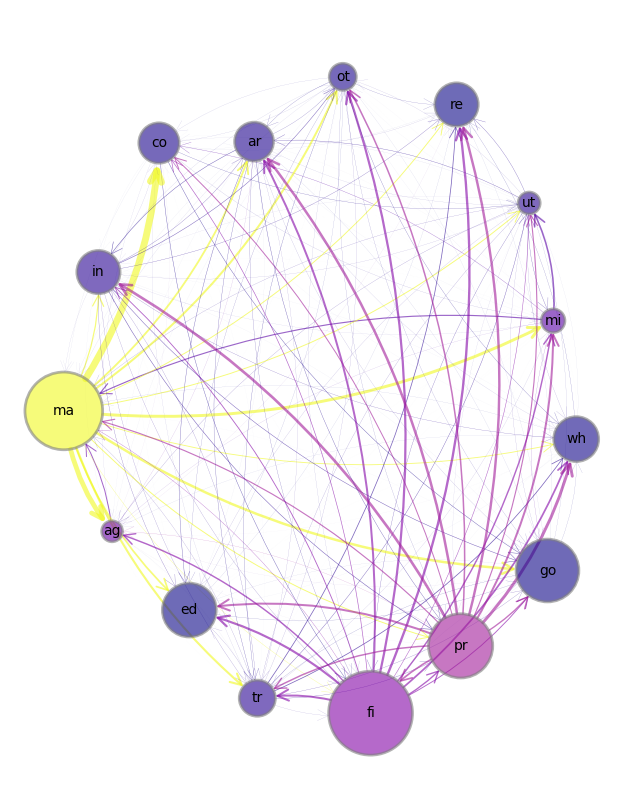

In [5]:
centrality = qbn_io.eigenvector_centrality(A)

# Remove self-loops
for i in range(A.shape[0]):
    A[i][i] = 0

fig, ax = plt.subplots(figsize=(8, 10))
plt.axis("off")
color_list = qbn_io.colorise_weights(centrality,beta=False)

qbn_plt.plot_graph(A, X, ax, codes,
              layout_type='spring',
              layout_seed=5432167,
              tol=0.0,
              node_color_list=color_list)

plt.show()

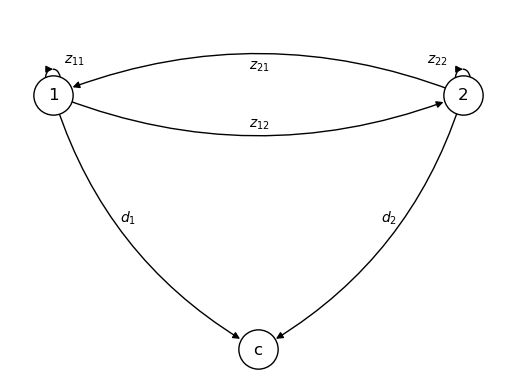

In [6]:
G = nx.DiGraph()

nodes= (1, 2, 'c')
edges = ((1, 1), (1, 2), (2, 1), (2, 2), (1, 'c'), (2, 'c'))
edges1 = ((1, 1), (1, 2), (2, 1), (2, 2), (1, 'c'))
edges2 = [(2,'c')]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos_list = ([0, 0], [2, 0], [1, -1])
pos = dict(zip(G.nodes(), pos_list))

fig, ax = plt.subplots()
plt.axis("off")

nx.draw_networkx_nodes(G, pos=pos, node_size=800,
                       node_color='white', edgecolors='black')
nx.draw_networkx_labels(G, pos=pos)
nx.draw_networkx_edges(G,pos=pos, edgelist=edges1,
                       node_size=300, connectionstyle='arc3,rad=0.2',
                       arrowsize=10, min_target_margin=15)
nx.draw_networkx_edges(G, pos=pos, edgelist=edges2,
                       node_size=300, connectionstyle='arc3,rad=-0.2',
                       arrowsize=10, min_target_margin=15)

plt.text(0.055, 0.125, r'$z_{11}$')
plt.text(1.825, 0.125, r'$z_{22}$')
plt.text(0.955, 0.1, r'$z_{21}$')
plt.text(0.955, -0.125, r'$z_{12}$')
plt.text(0.325, -0.5, r'$d_{1}$')
plt.text(1.6, -0.5, r'$d_{2}$')

plt.show()

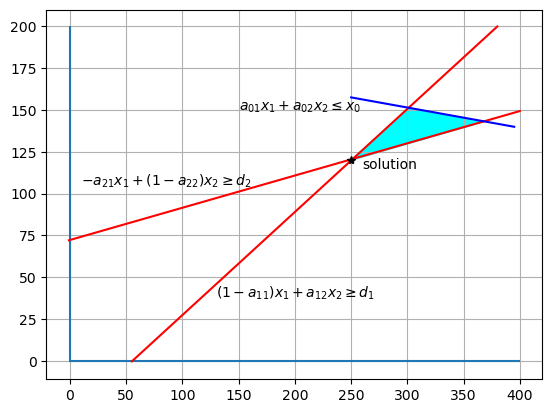

In [7]:
fig, ax = plt.subplots()
ax.grid()

# Draw constraint lines
ax.hlines(0, -1, 400)
ax.vlines(0, -1, 200)

ax.plot(np.linspace(55, 380, 100), (50-0.9*np.linspace(55, 380, 100))/(-1.46), color="r")
ax.plot(np.linspace(-1, 400, 100), (60+0.16*np.linspace(-1, 400, 100))/0.83, color="r")
ax.plot(np.linspace(250, 395, 100), (62-0.04*np.linspace(250, 395, 100))/0.33, color="b")

ax.text(130, 38, "$(1-a_{11})x_1 + a_{12}x_2 \geq d_1$", size=10)
ax.text(10, 105, "$-a_{21}x_1 + (1-a_{22})x_2 \geq d_2$", size=10)
ax.text(150, 150, "$a_{01}x_1 +a_{02}x_2 \leq x_0$", size=10)

# Draw the feasible region
feasible_set = Polygon(np.array([[301, 151],
                                 [368, 143],
                                 [250, 120]]),
                       color="cyan")
ax.add_patch(feasible_set)

# Draw the optimal solution
ax.plot(250, 120, "*", color="black")
ax.text(260, 115, "solution", size=10)

plt.show()

In [8]:
A = np.array([[0.1, 40],
             [0.01, 0]])
d = np.array([50, 2]).reshape((2, 1))

In [9]:
I = np.identity(2)
B = I - A
B

array([[ 9.e-01, -4.e+01],
       [-1.e-02,  1.e+00]])

In [10]:
np.linalg.det(B) > 0 # checking Hawkins-Simon conditions

True

In [11]:
I = np.identity(2)
B = I - A

L = np.linalg.inv(B) # obtaining Leontieff inverse matrix
L

array([[2.0e+00, 8.0e+01],
       [2.0e-02, 1.8e+00]])

In [12]:
x = L @ d   # solving for gross ouput
x

array([[260. ],
       [  4.6]])

In [13]:
a0 = np.array([4, 100])
A0 = a0 @ L
A0

array([ 10., 500.])

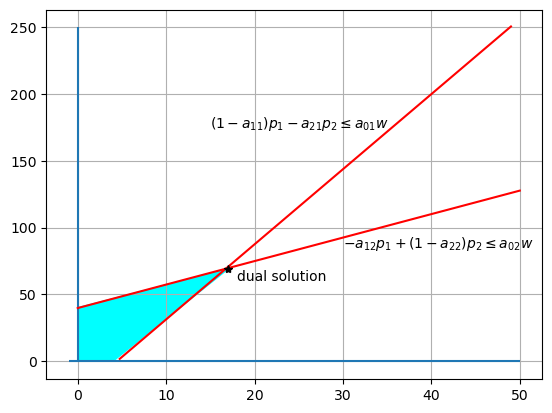

In [14]:
fig, ax = plt.subplots()
ax.grid()

# Draw constraint lines
ax.hlines(0, -1, 50)
ax.vlines(0, -1, 250)

ax.plot(np.linspace(4.75, 49, 100), (4-0.9*np.linspace(4.75, 49, 100))/(-0.16), color="r")
ax.plot(np.linspace(0, 50, 100), (33+1.46*np.linspace(0, 50, 100))/0.83, color="r")

ax.text(15, 175, "$(1-a_{11})p_1 - a_{21}p_2 \leq a_{01}w$", size=10)
ax.text(30, 85, "$-a_{12}p_1 + (1-a_{22})p_2 \leq a_{02}w$", size=10)

# Draw the feasible region
feasible_set = Polygon(np.array([[17, 69],
                                 [4, 0],
                                 [0,0],
                                 [0, 40]]),
                       color="cyan")
ax.add_patch(feasible_set)

# Draw the optimal solution
ax.plot(17, 69, "*", color="black")
ax.text(18, 60, "dual solution", size=10)

plt.show()

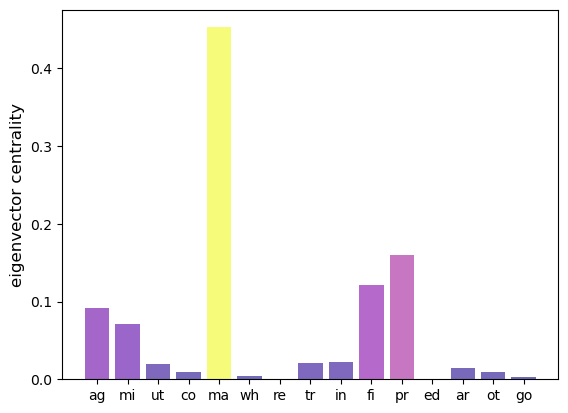

In [15]:
fig, ax = plt.subplots()
ax.bar(codes, centrality, color=color_list, alpha=0.6)
ax.set_ylabel("eigenvector centrality", fontsize=12)
plt.show()

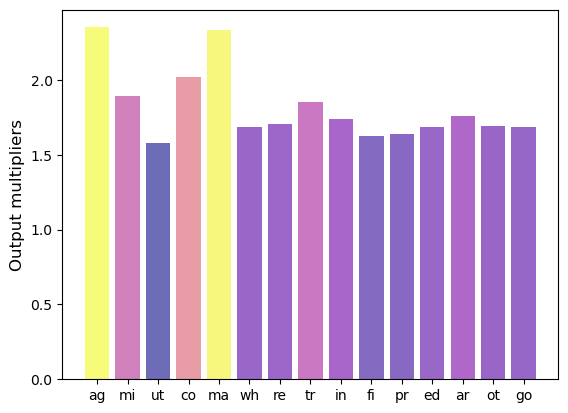

In [16]:
A, F = build_coefficient_matrices(Z, X)
omult = qbn_io.katz_centrality(A, authority=True)

fig, ax = plt.subplots()
omult_color_list = qbn_io.colorise_weights(omult,beta=False)
ax.bar(codes, omult, color=omult_color_list, alpha=0.6)
ax.set_ylabel("Output multipliers", fontsize=12)
plt.show()

In [17]:
A = np.array([[0.1, 1.46],
              [0.16, 0.17]])
a_0 = np.array([0.04, 0.33])

In [18]:
I = np.identity(2)
B = I - A
L = np.linalg.inv(B)

In [19]:
A_0 = a_0 @ L
A_0

array([0.16751071, 0.69224776])